In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('TaxiDataCleaned.csv')
df.head()

,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_miles,payment_type,company,trip_seconds,dropoff_community_area,tips
0,8.0,12.45,5,19,6,1400269500,41.903046,-87.657551,41.899786,-87.648077,0.0,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,0.0,8.0,0.0
1,8.0,0.00,3,19,5,1362683700,41.903046,-87.657551,41.899786,-87.648077,0.0,Unknown,Chicago Elite Cab Corp.,300.0,8.0,0.0
2,60.0,27.05,10,2,3,1380593700,41.836150,-87.648788,41.899786,-87.648077,12.6,Cash,Taxi Affiliation Services,1380.0,8.0,0.0
3,10.0,5.85,10,1,2,1382319000,41.985015,-87.804532,41.899786,-87.648077,0.0,Cash,Taxi Affiliation Services,180.0,8.0,0.0
4,14.0,16.65,5,7,5,1369897200,41.968069,-87.721559,41.899786,-87.648077,0.0,Cash,Dispatch Taxi Affiliation,1080.0,8.0,0.0


## Q 2.a

<Axes: xlabel='trip_start_hour'>

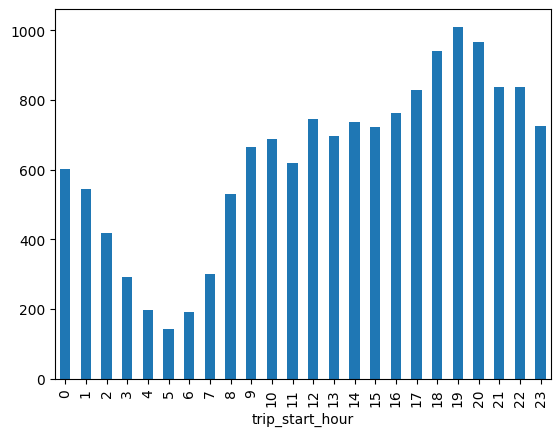

In [3]:
df.groupby('trip_start_hour').count()['tips'].plot(kind='bar')

$18:00 - 21:00$ is the time interval with high demand. It is the busiest time of the day on average. The demand is the lowest between $4:00 - 7:00$. The cab companies can have a better understanding of the demand and supply of cabs by analyzing the data of the time intervals. They can allocate more cabs during the peak hours and fewer cabs during the off-peak hours. They can also offer discounts during the off-peak hours to attract more customers.

<Axes: xlabel='trip_start_day'>

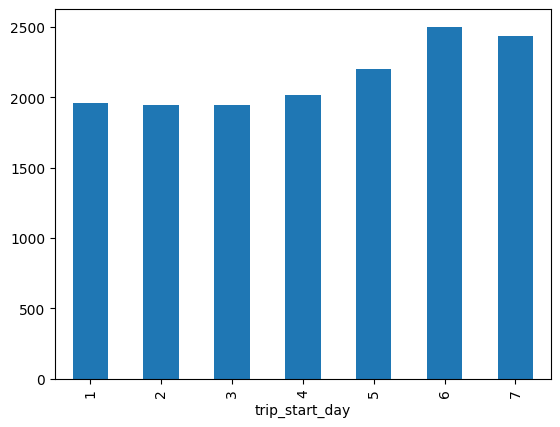

In [5]:
df.groupby('trip_start_day').count()['tips'].plot(kind='bar')

The number of trips are mostly constant across the week with a slight increase on weekends. Monday and Tuesday are the least busiest days. The cab companies can raise the prices during the weekends to maximize their profits. They can also offer discounts during the weekdays to attract more customers.

<Axes: xlabel='trip_start_month'>

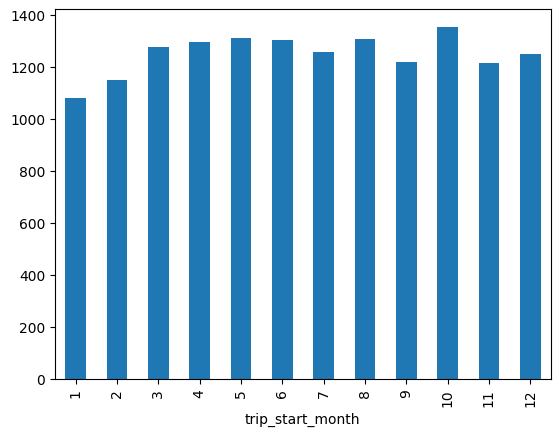

In [6]:
df.groupby('trip_start_month').count()['tips'].plot(kind='bar')

Summer months seem to have a higher average in general wheras the overall peak occurs in October.

## Q 2.b

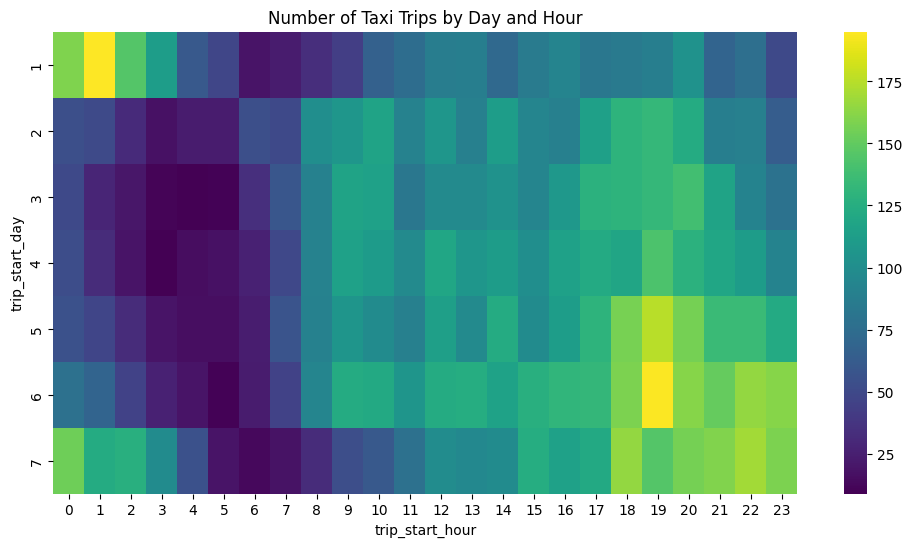

In [7]:
# Create a heatmap showing trip frequency by the hour to identify the busiest hours for taxi trips
hourly_trips = df.groupby(['trip_start_day', 'trip_start_hour']).size()
hourly_trips = hourly_trips.reset_index(name='count')
hourly_trips = hourly_trips.pivot(index='trip_start_day', columns='trip_start_hour', values='count')
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_trips, cmap='viridis')
plt.title('Number of Taxi Trips by Day and Hour')
plt.show()

Overall, weekend nights have the highest average number of trips, while the number of trips is considerably lower in the morning, likely due to it being sleep time.

In [20]:
hourly_trips

trip_start_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
trip_start_day,,,,,,,,,,,,,,,,,,,,,
1,159,195,145,112,60,48,19,23,33,43,...,72,86,93,83,85,88,103,68,76,50
2,54,51,31,17,23,23,54,50,100,107,...,112,94,89,114,129,133,123,88,89,63
3,50,28,20,11,9,10,34,59,90,117,...,104,94,108,128,129,133,139,117,92,79
4,52,32,19,9,15,17,26,49,91,115,...,111,100,115,122,118,142,128,119,111,92
5,55,47,32,19,16,16,24,57,90,106,...,123,98,112,129,157,175,156,135,135,122
6,78,68,46,26,19,10,23,46,94,123,...,116,126,131,132,158,194,161,151,165,161
7,154,123,126,98,55,19,13,18,32,53,...,98,124,115,121,165,145,156,160,169,158


In [77]:
[hourly_trips > 150]
peak_hours = []
for i in range (0,7):
    for j in range (0,24):
        if hourly_trips.iloc[i,j] > 150:
            peak_hours.append([i,j])

array([[<Axes: title={'center': 'trip_miles'}>]], dtype=object)

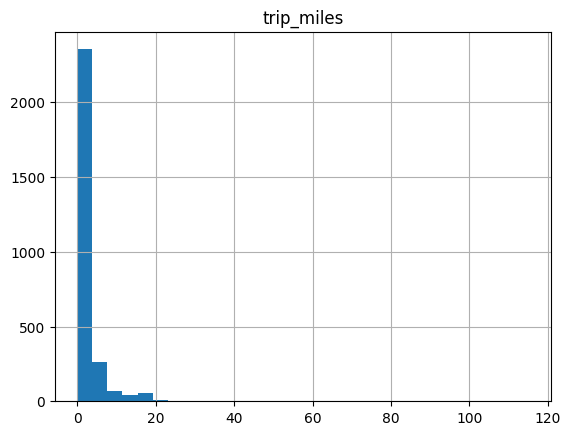

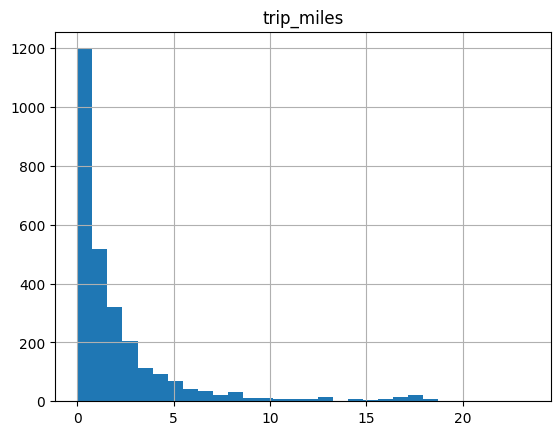

In [76]:
peak_df = df[(df['trip_start_day'] == peak_hours[0][0]+1) & (df['trip_start_hour'] == peak_hours[0][1])]
for i in range(1,len(peak_hours)):
    peak_df = pd.concat([peak_df, df[(df['trip_start_day'] == peak_hours[i][0]+1) & (df['trip_start_hour'] == peak_hours[i][1])]])
peak_df.hist('trip_miles', bins=30)
peak_df[peak_df['trip_miles'] < 25].hist('trip_miles', bins=30)

Most people prefer taking shorter trips during the peak hours. However this is not a perfect way to analyze this data since we our not taking into account that a longer trip keeps a cab occupied for a longer time and hence accounts for lesser number of trips.  Long trips during peak hours can lead to lesser cab availability.

## Q 2.c

<Axes: >

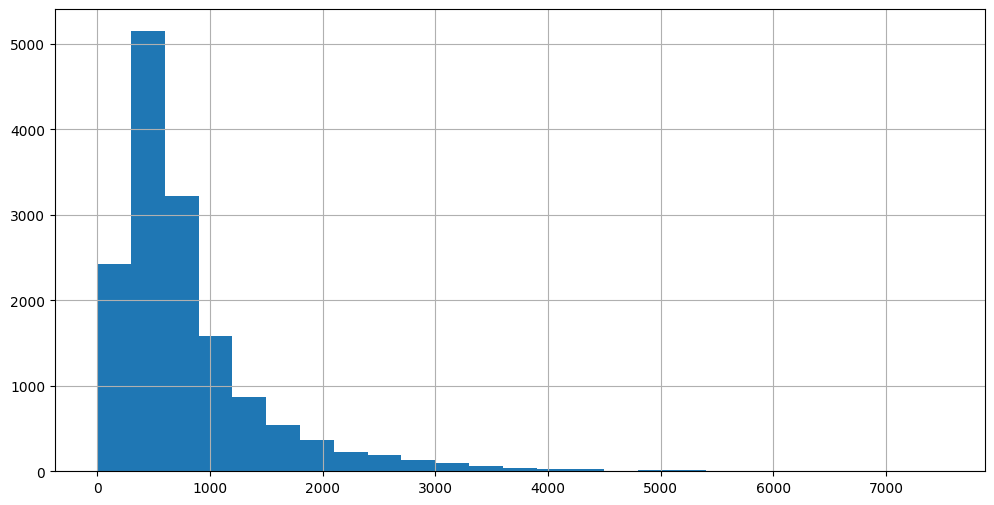

In [11]:
df[df['trip_seconds'] < 10000]['trip_seconds'].hist(bins=25, figsize=(12, 6))

<Axes: >

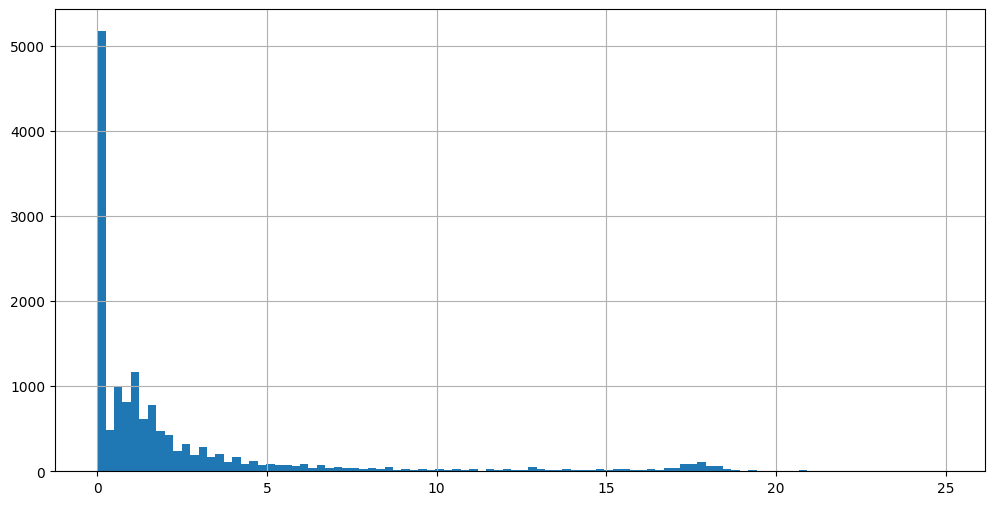

In [12]:
df[df['trip_miles'] < 25]['trip_miles'].hist(bins=100, figsize=(12, 6))

From both of the above histograms we can judge that most people prefer taking shorter trips. However this is not a perfect way to analyze this data since we our not taking into account that a longer trip keeps a cab occupied for a longer time and hence accounts for lesser number of trips.

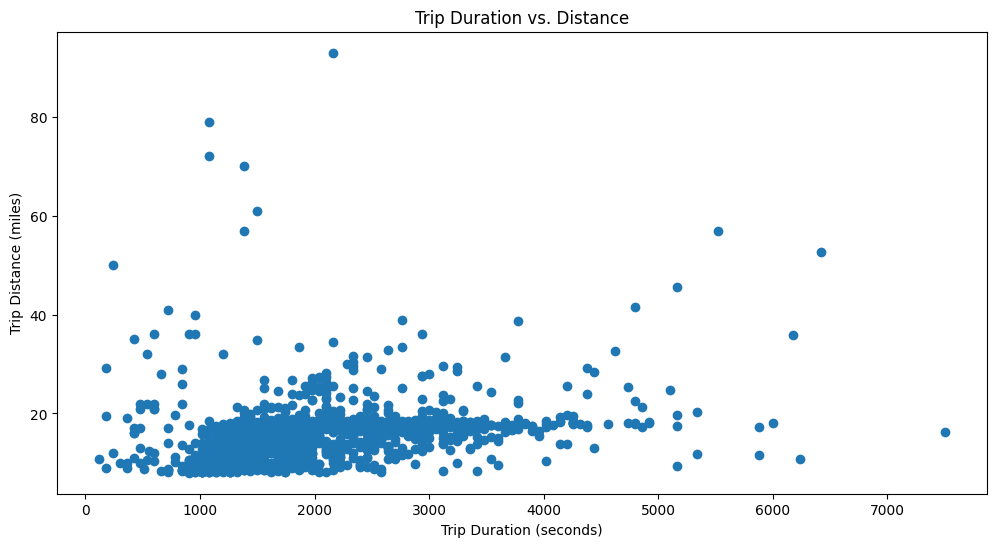

In [84]:
# Use a scatter plot to show the relationship between trip duration and distance
plt.figure(figsize=(12, 6))
plt.scatter(df[(df['trip_seconds'] < 10000) & (df['trip_seconds'] > 10) & (df['trip_miles'] < 100) & (df['trip_miles'] > 8)]['trip_seconds'], df[(df['trip_seconds'] < 10000) & (df['trip_seconds'] > 10) & (df['trip_miles'] < 100) & (df['trip_miles'] > 8)]['trip_miles'])
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Trip Distance (miles)')
plt.title('Trip Duration vs. Distance')
plt.show()

The Trip Duration vs. Distance scatter plot shows a positive correlation between trip duration and distance. This is expected, as longer trips will take more time to complete. However, there are also many short trips that take a long time to complete. This could be due to traffic congestion or other factors that slow down the trip.

## Q 2.d

In [14]:
monthly_data = pd.DataFrame(df.groupby('trip_start_month').count()['tips'])
monthly_data.columns = ['trip_count']
# monthly_data = df.groupby('trip_start_month').count()['tips']
monthly_data['trip_miles'] = df.groupby('trip_start_month').sum()['trip_miles'] / df.groupby('trip_start_month').count()['trip_miles']

<Axes: xlabel='trip_start_month'>

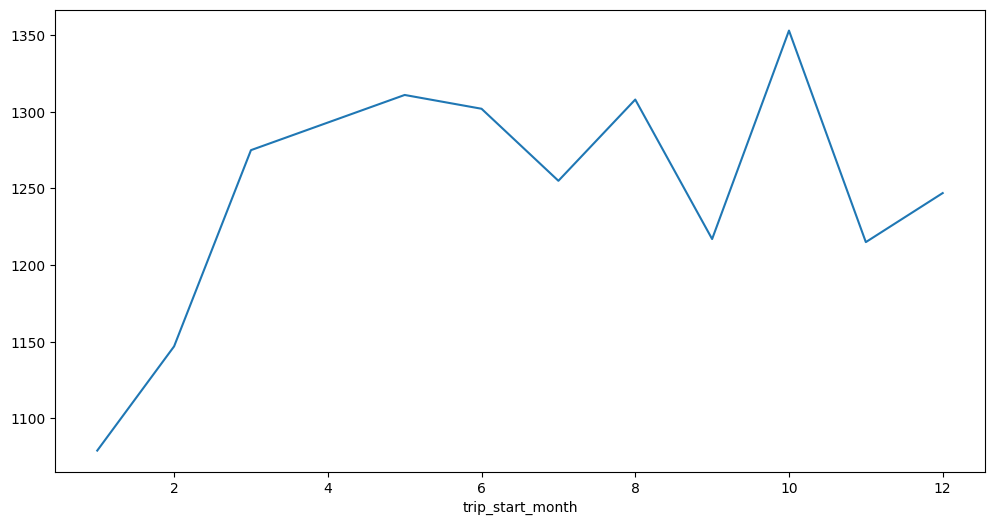

In [15]:
# plot on different plots
monthly_data['trip_count'].plot(kind='line', figsize=(12, 6))

Summer months have a higher average number of trips in general. The overall peak occurs in October whereas September, November December, January, February have the lowest number of trips. In general cabs are more in demand during the summer months than winter months (with the exception of October).

<Axes: xlabel='trip_start_month'>

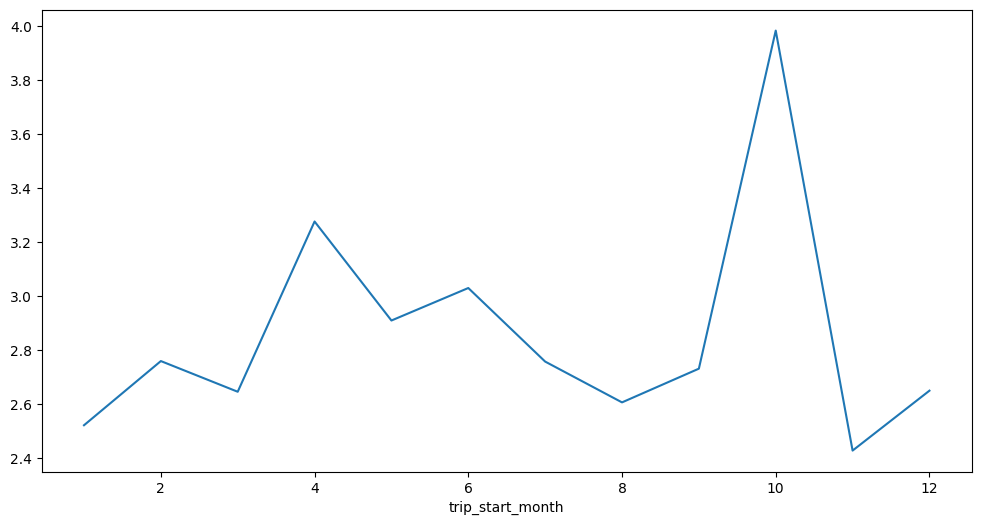

In [16]:
# df.groupby('trip_start_month').sum()['trip_miles']
monthly_data['trip_miles'].plot(kind='line', figsize=(12, 6))

October has the longest trips, this might be due to many reasons including the weather, the fact that it is a holiday season, etc. The shortest trips are in December, January, February and March. This could be due to the cold weather. The companies can maybe offer discounts on longer trips during the winter months to attract more customers.

## Q 2.e

c:\Users\mouli\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\tools.py:233: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)


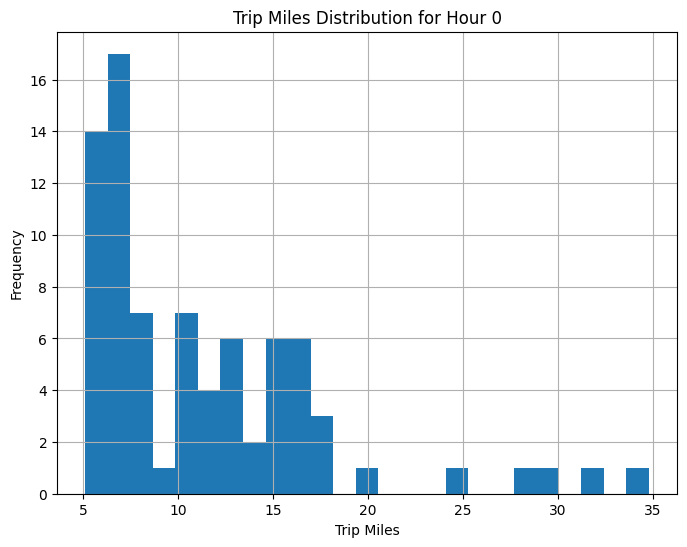

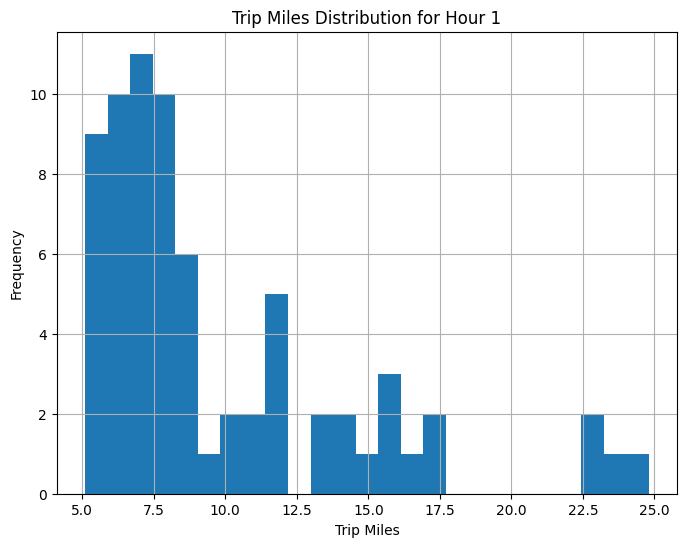

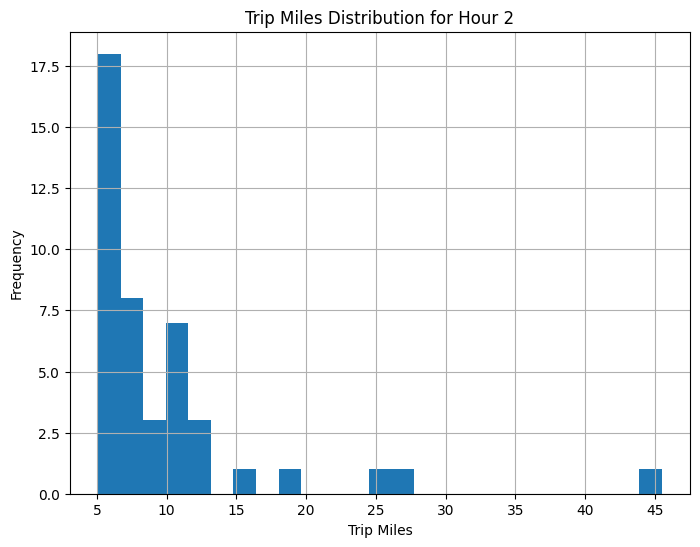

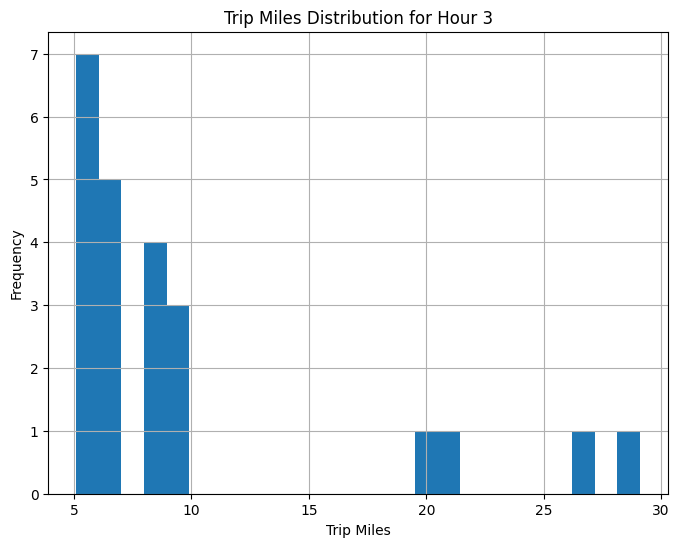

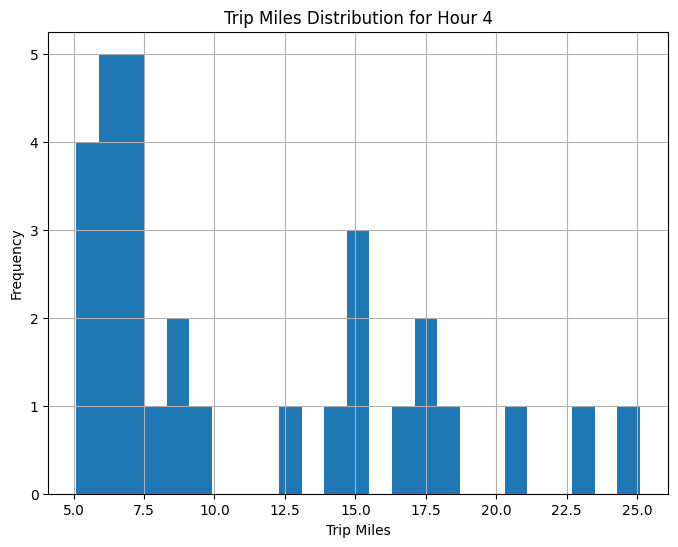

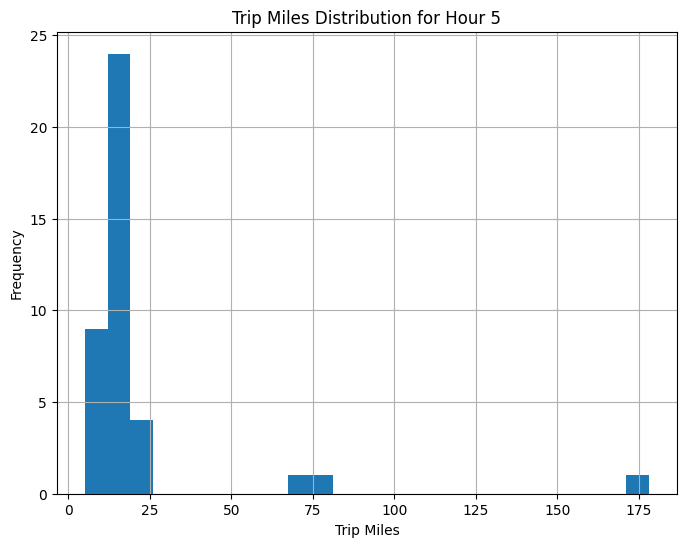

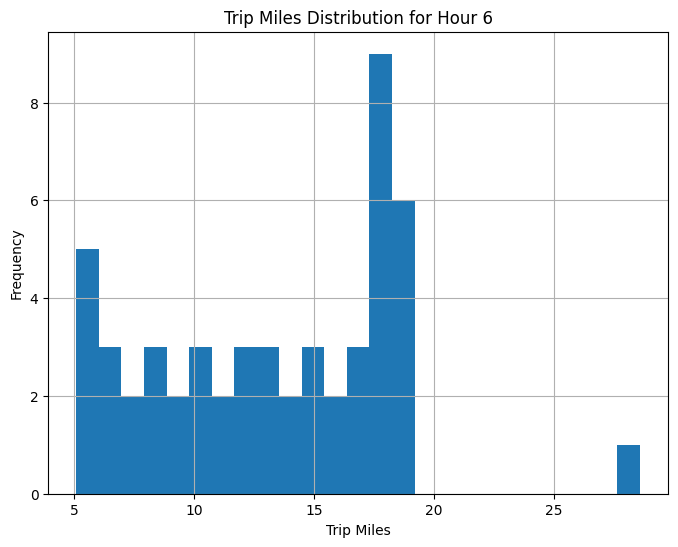

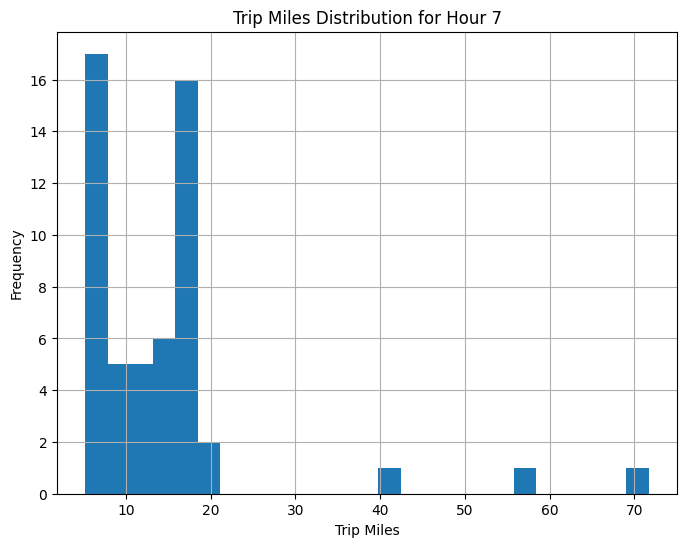

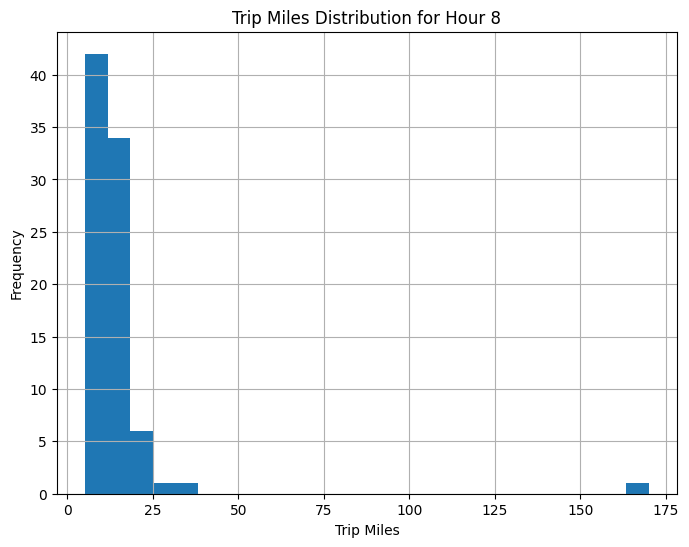

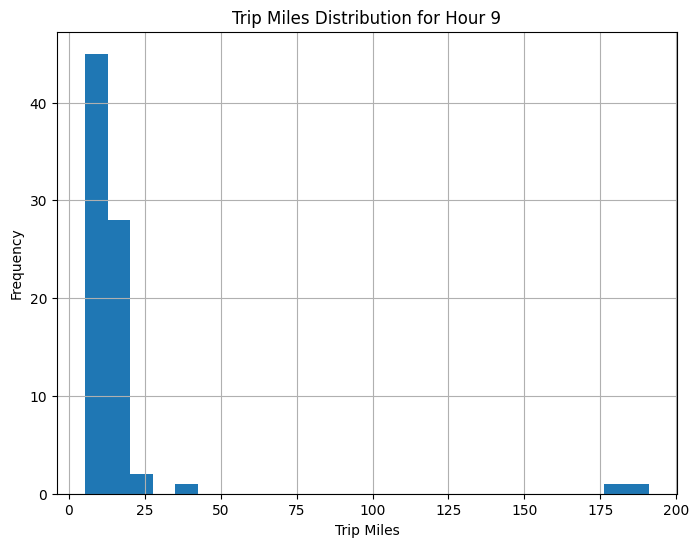

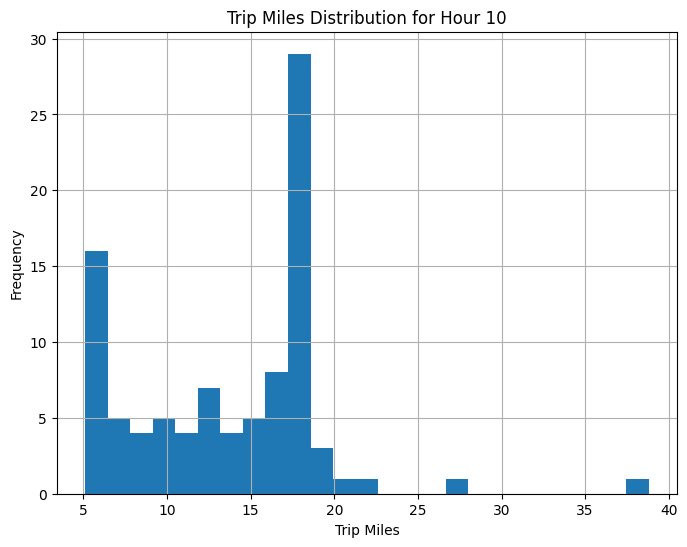

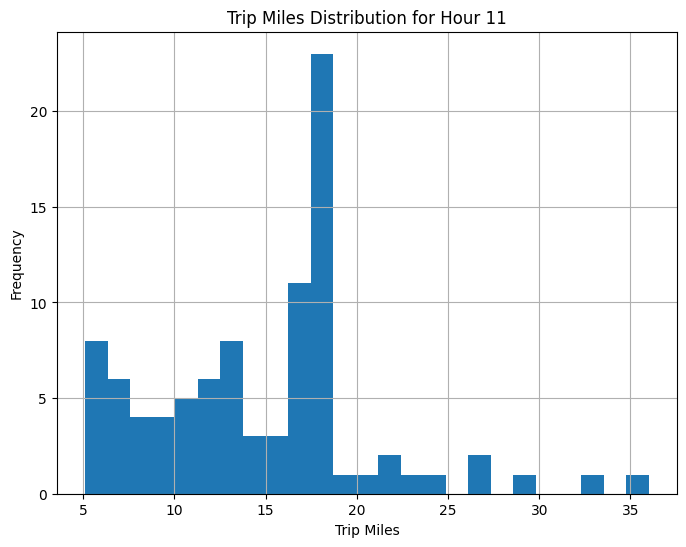

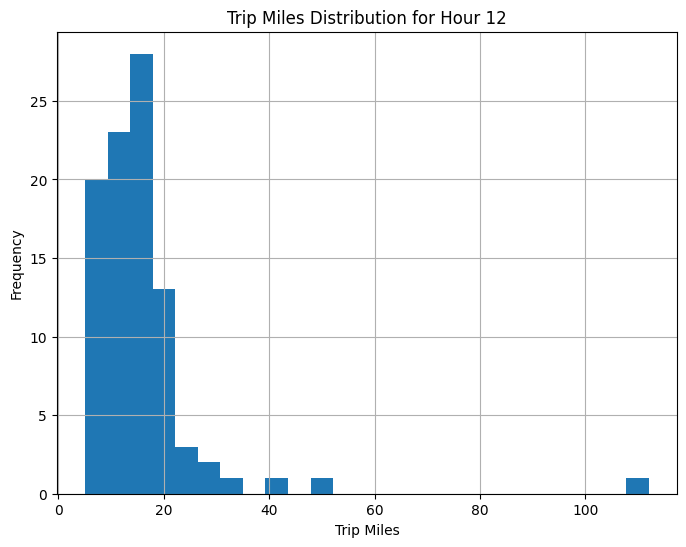

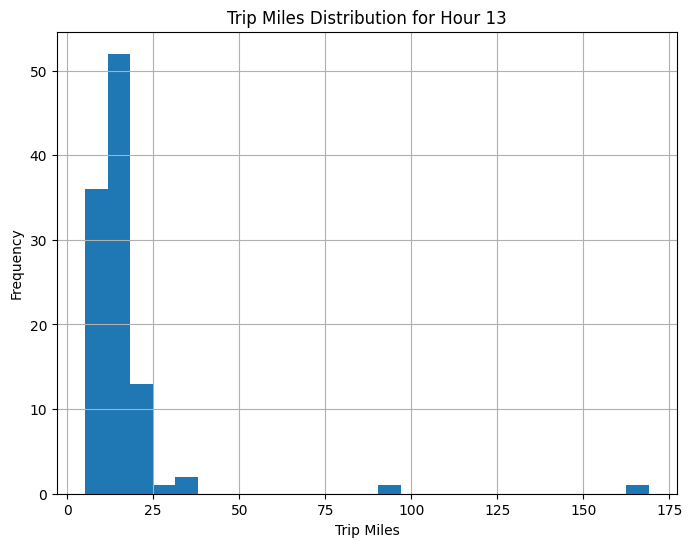

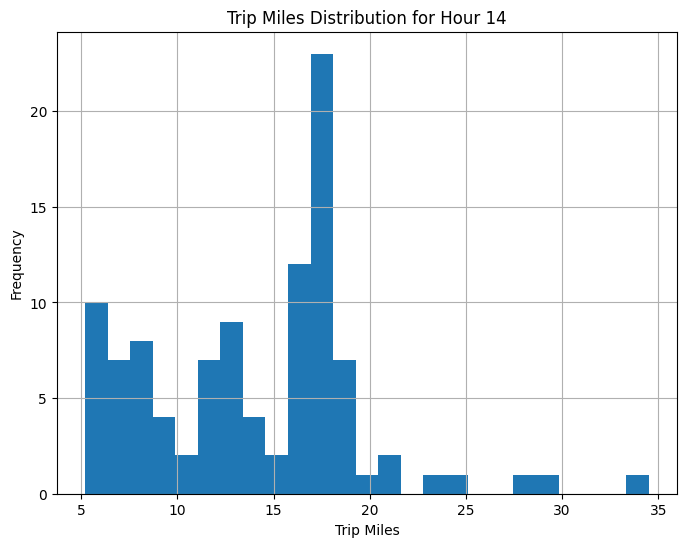

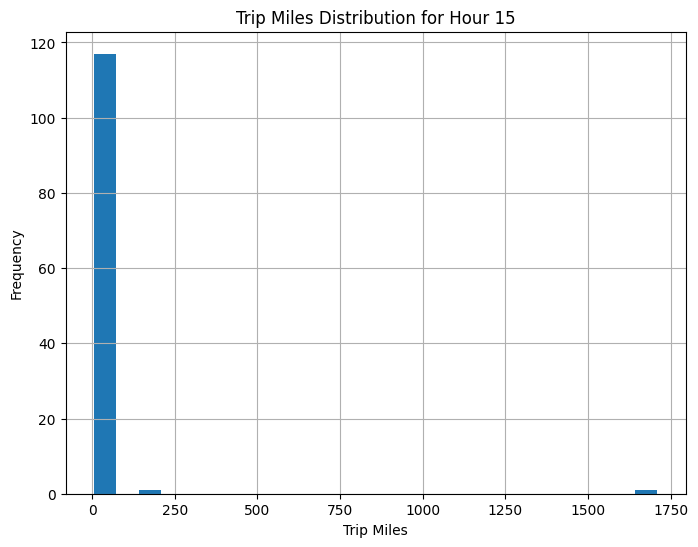

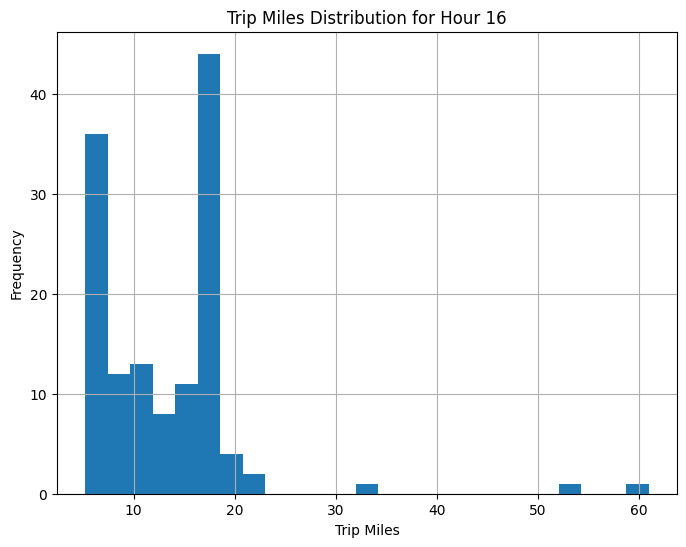

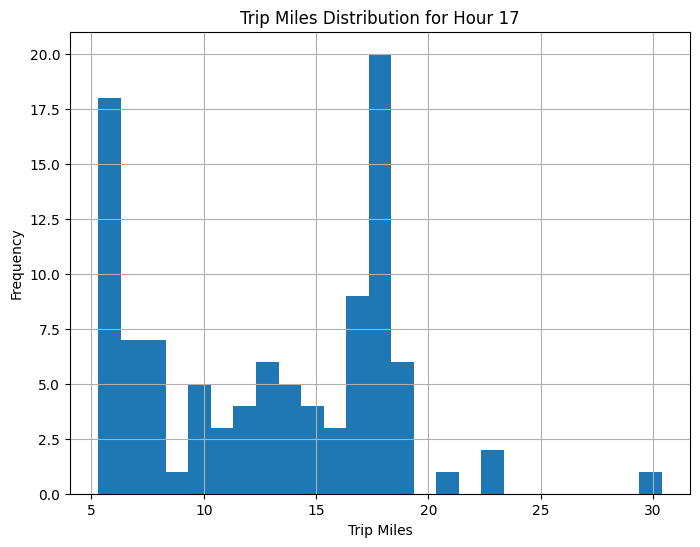

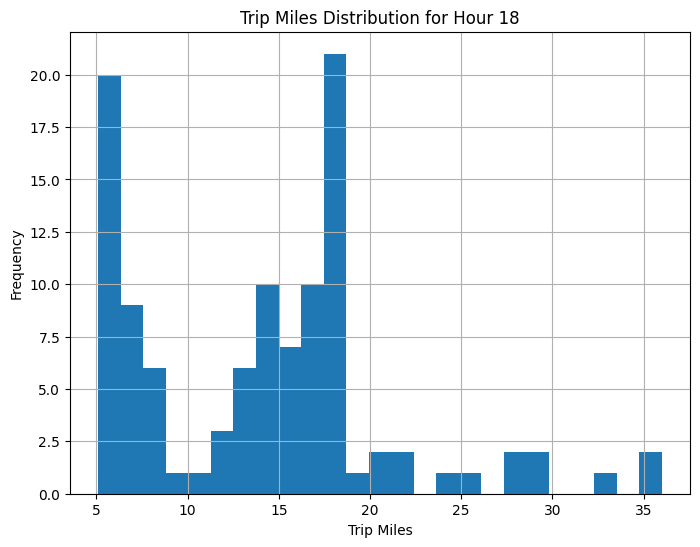

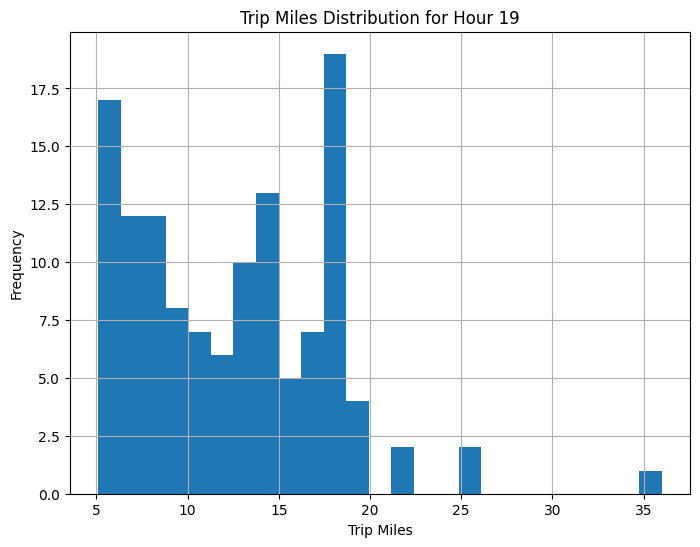

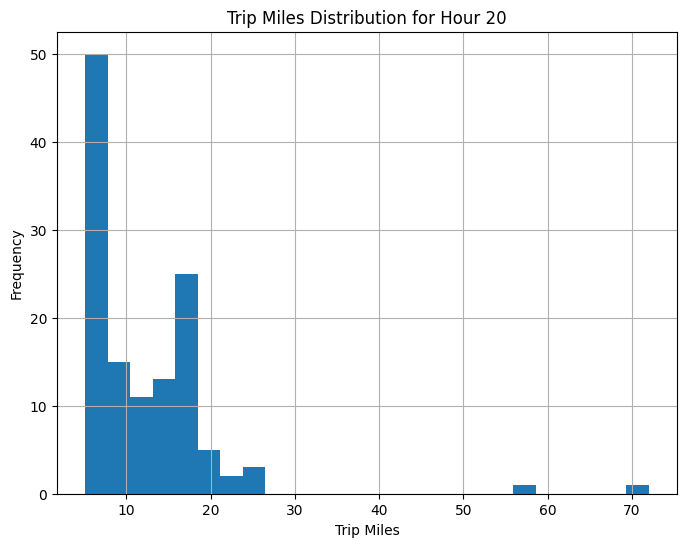

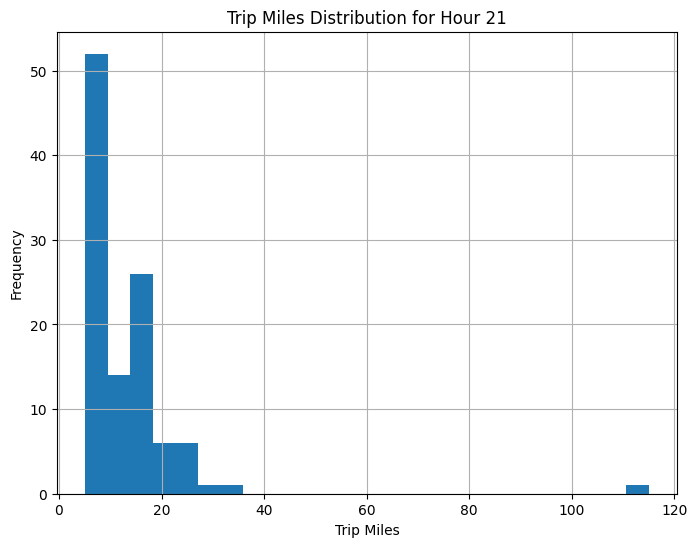

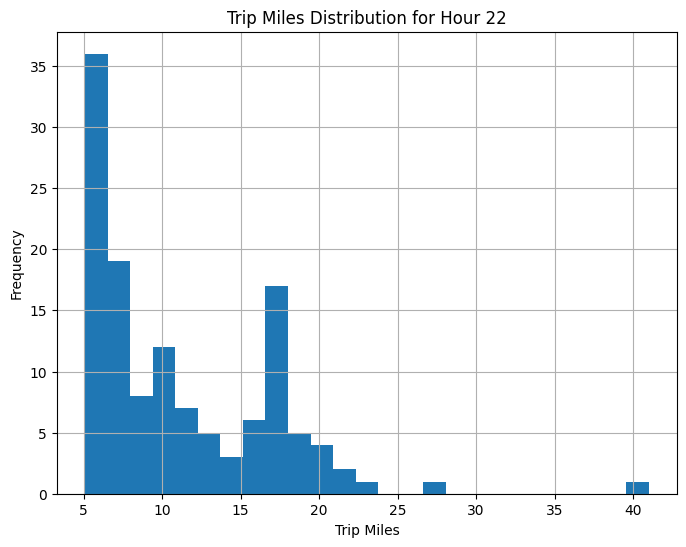

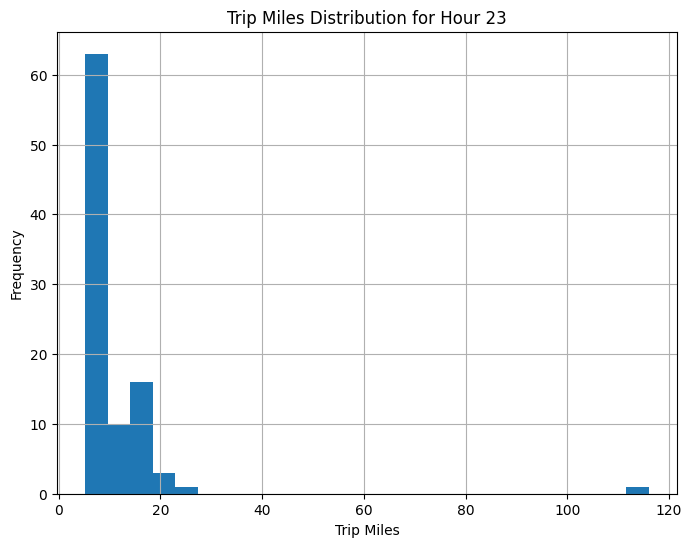

In [88]:
from turtle import title


for hour in range(0, 24):
    df[(df['trip_start_hour'] == hour) & (df['trip_miles'] > 5)].hist('trip_miles', bins=25, figsize=(8, 6))
    plt.title(f'Trip Miles Distribution for Hour {hour}')
    plt.xlabel('Trip Miles')
    plt.ylabel('Frequency')

People prefer to take moderately long trips during the peak hours as compared to other times.(Note: for analyzing the data properly short trips with distance < 5 were not considered)